In [167]:
import pandas as pd
import re
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [168]:
data=pd.read_csv("train.csv")
data1=pd.read_csv("test.csv")
le = LabelEncoder()

In [169]:
data['Constituency ∇'] = data['Constituency ∇'].astype(str)
data['Constituency ∇'] = data['Constituency ∇'].apply(lambda x: 'General' if re.match(r'^\((?!SC|ST).*\)$', x) else x)
df_filtered = data[data['Constituency ∇'].str.contains(r'\((SC|ST)\)', regex=True)]
categories = df_filtered['Constituency ∇'].str.extract(r'\((SC|ST)\)')[0]
data['Category'] = 'General'
data.loc[data['ID'].isin(categories.index), 'Category'] =categories

data1['Constituency ∇'] = data1['Constituency ∇'].astype(str)
data1['Constituency ∇'] = data1['Constituency ∇'].apply(lambda x: 'General' if re.match(r'^\((?!SC|ST).*\)$', x) else x)
df_filtered = data1[data1['Constituency ∇'].str.contains(r'\((SC|ST)\)', regex=True)]
categories = df_filtered['Constituency ∇'].str.extract(r'\((SC|ST)\)')[0]
data1['Category'] = 'General'
data1.loc[data['ID'].isin(categories.index), 'Category'] =categories

<ipython-input-169-dccb07118074>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = data[data['Constituency ∇'].str.contains(r'\((SC|ST)\)', regex=True)]
<ipython-input-169-dccb07118074>:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = data1[data1['Constituency ∇'].str.contains(r'\((SC|ST)\)', regex=True)]


In [170]:
columns_to_drop=['Candidate','Constituency ∇']
data.drop(columns=columns_to_drop, inplace=True)
columns_to_drop=['Candidate','Constituency ∇']
data1.drop(columns=columns_to_drop, inplace=True)


In [171]:
def convert_text_to_number(text):

    multipliers = {
        'Lac': 100000,
        'Crore': 10000000,
        'Thou': 1000,
        'Hund': 100
    }


    pattern = r'(\d+) (\w+)\+'
    matches = re.findall(pattern, text)
    total = 0
    for num, unit in matches:
        total += int(num) * multipliers[unit]

    return total


In [172]:
data['Assets_num'] = data['Total Assets'].apply(convert_text_to_number)
data['Liabilites_num'] = data['Liabilities'].apply(convert_text_to_number)
data1['Assets_num'] = data1['Total Assets'].apply(convert_text_to_number)
data1['Liabilites_num'] = data1['Liabilities'].apply(convert_text_to_number)
data1

,ID,Party,Criminal Case,Total Assets,Liabilities,state,Category,Assets_num,Liabilites_num
0,0,IND,2,70 Crore+,11 Crore+,MAHARASHTRA,General,700000000,110000000
1,1,AITC,1,2 Crore+,13 Lac+,WEST BENGAL,General,20000000,1300000
2,2,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA,General,490000000,10000000
3,3,AITC,1,2 Crore+,0,WEST BENGAL,General,20000000,0
4,4,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH,General,160000000,20000000
...,...,...,...,...,...,...,...,...,...
1369,1369,BJP,0,1 Crore+,0,WEST BENGAL,General,10000000,0
1370,1370,BJD,1,0,13 Lac+,ODISHA,General,0,1300000
1371,1371,INC,1,5 Crore+,0,BIHAR,General,50000000,0
1372,1372,BJP,1,2 Crore+,5 Lac+,HIMACHAL PRADESH,General,20000000,500000


In [173]:
columns_to_drop=['Total Assets','Liabilities']
data.drop(columns=columns_to_drop, inplace=True)
columns_to_drop=['Total Assets','Liabilities']
data1.drop(columns=columns_to_drop, inplace=True)

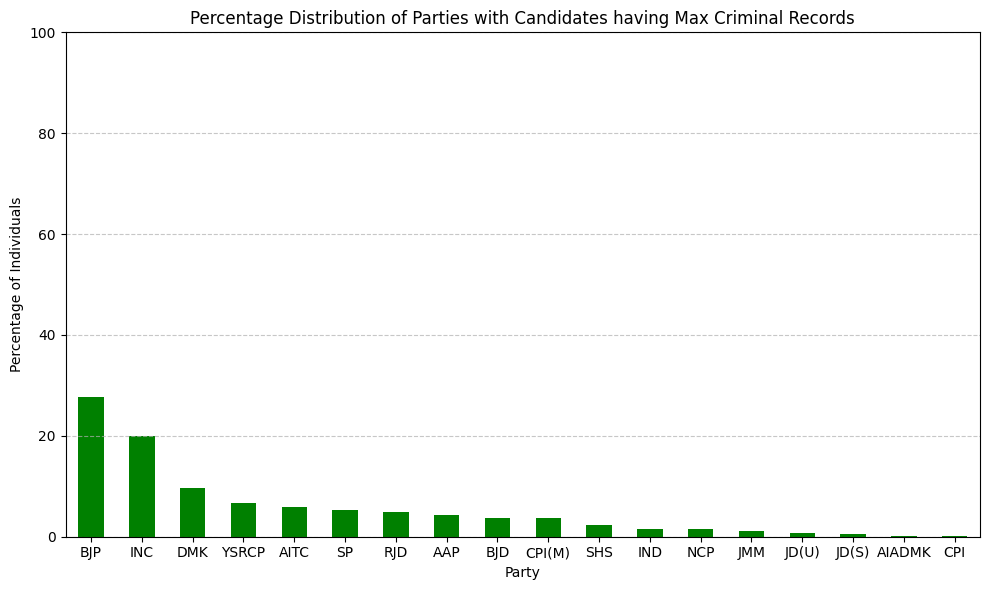

In [174]:
df = pd.DataFrame(data)


sorted_df = df.sort_values(by='Criminal Case', ascending=False)


top_25_percent = sorted_df.head(int(len(sorted_df) * 0.25))

party_percentage = top_25_percent['Party'].value_counts(normalize=True) * 100


plt.figure(figsize=(10, 6))
party_percentage.plot(kind='bar', color='green')
plt.title('Percentage Distribution of Parties with Candidates having Max Criminal Records')
plt.xlabel('Party')
plt.ylabel('Percentage of Individuals')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

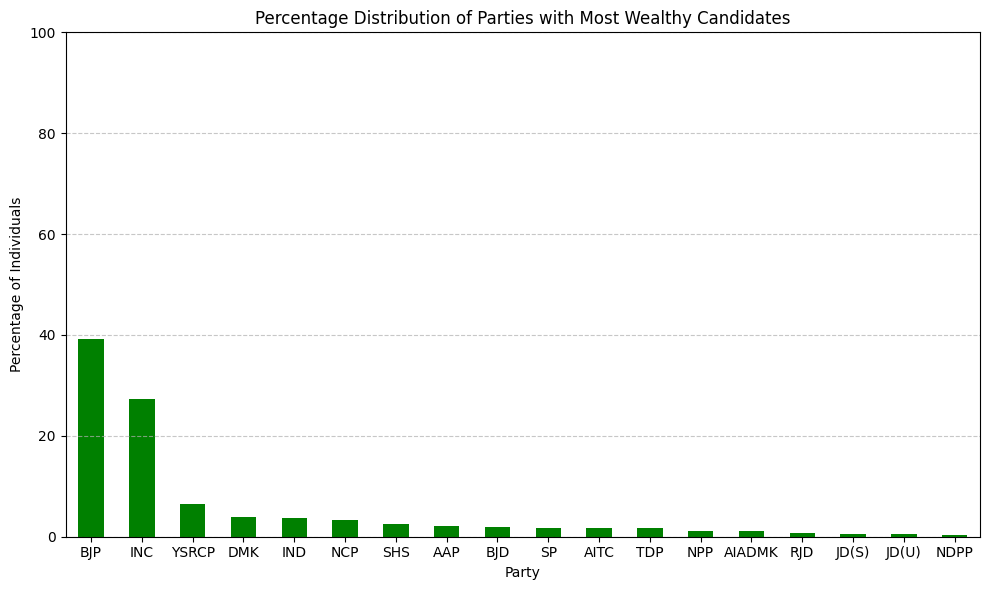

In [175]:
df = pd.DataFrame(data)


sorted_df = df.sort_values(by='Assets_num', ascending=False)


top_25_percent = sorted_df.head(int(len(sorted_df) * 0.20))

party_percentage = top_25_percent['Party'].value_counts(normalize=True) * 100


plt.figure(figsize=(10, 6))
party_percentage.plot(kind='bar', color='green')
plt.title('Percentage Distribution of Parties with Most Wealthy Candidates')
plt.xlabel('Party')
plt.ylabel('Percentage of Individuals')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [176]:
data['Category'] = le.fit_transform(data['Category'])
data['state'] = le.fit_transform(data['state'])
data['Party'] = le.fit_transform(data['Party'])


data1['Category'] = le.fit_transform(data1['Category'])
data1['state'] = le.fit_transform(data1['state'])
data1['Party'] = le.fit_transform(data1['Party'])

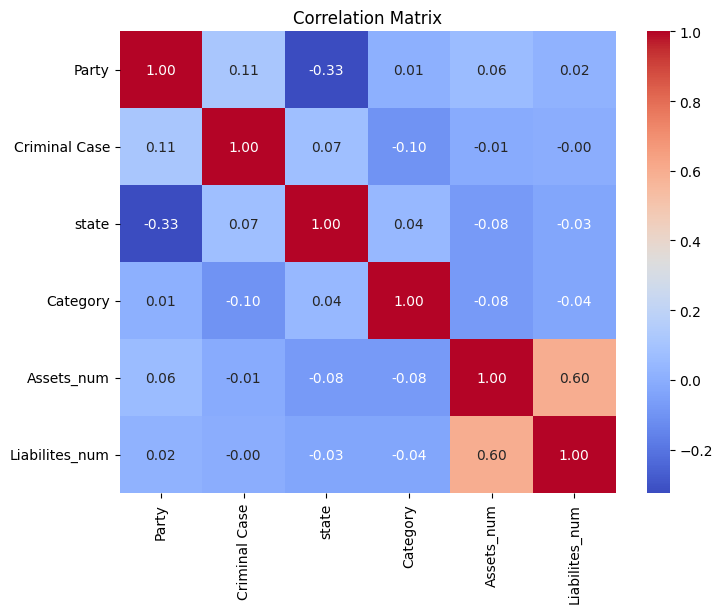

In [177]:
df = pd.DataFrame(data)
columns_to_drop=['Education','ID']
df.drop(columns=columns_to_drop, inplace=True)

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [178]:
Y=data['Education']

<Axes: xlabel='Assets_num', ylabel='Education'>

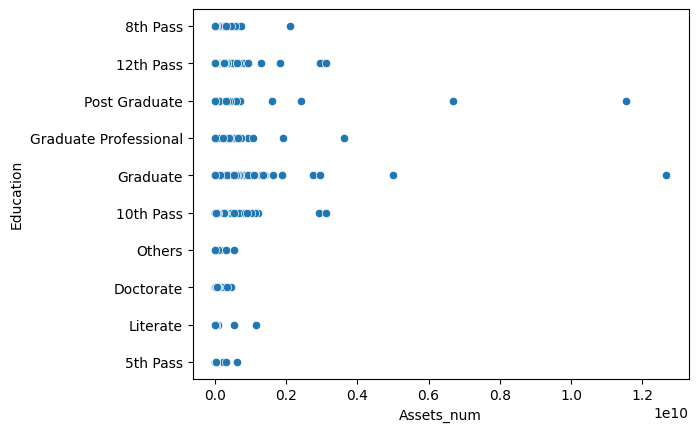

In [179]:
Assets=data['Assets_num']
sns.scatterplot(x=Assets, y=Y)

<Axes: xlabel='Liabilites_num', ylabel='Education'>

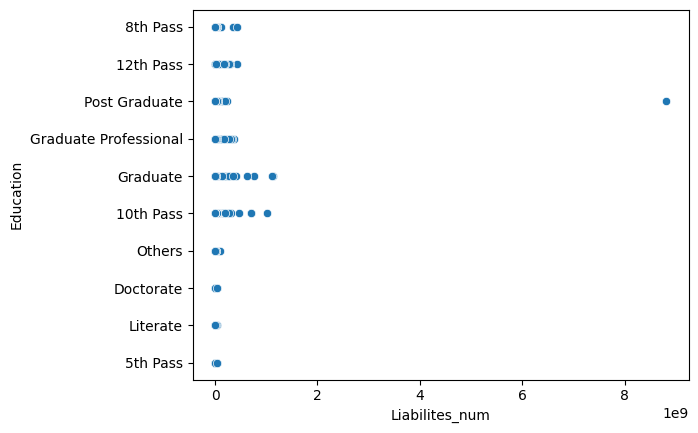

In [180]:
Liabilities=data['Liabilites_num']
sns.scatterplot(x=Liabilities, y=Y)

In [181]:
z_scores = zscore(data['Assets_num'])
threshold = 3
data = data[(z_scores < threshold) & (z_scores > -threshold)]
z_scores = zscore(data['Liabilites_num'])
threshold = 3
data = data[(z_scores < threshold) & (z_scores > -threshold)]
Y=data['Education']

In [182]:
columns_to_drop=['Education']
data.drop(columns=columns_to_drop, inplace=True)

In [183]:
columns_to_drop=['ID']
data.drop(columns=columns_to_drop, inplace=True)
columns_to_drop=['ID']
data1.drop(columns=columns_to_drop, inplace=True)

<Axes: xlabel='Assets_num', ylabel='Education'>

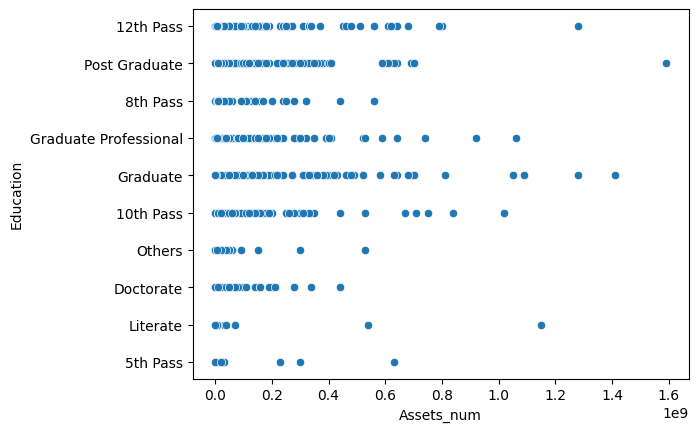

In [184]:

Assets=data['Assets_num']
sns.scatterplot(x=Assets, y=Y)



<Axes: xlabel='Liabilites_num', ylabel='Education'>

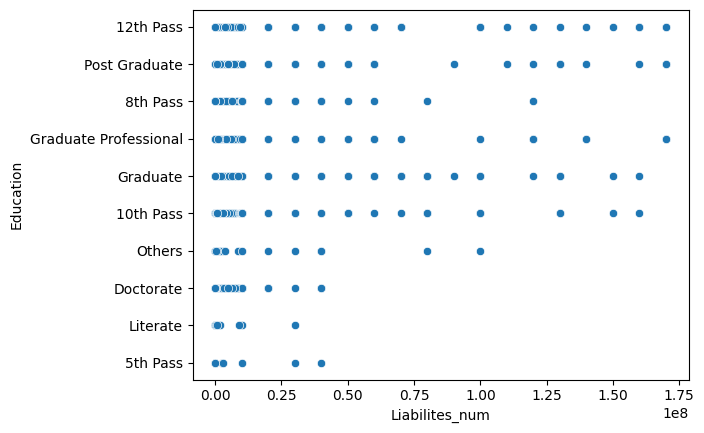

In [185]:
Liabilities=data['Liabilites_num']
sns.scatterplot(x=Liabilities, y=Y)

In [186]:
#smote = SMOTE(random_state=50)

#X_resampled, y_resampled = smote.fit_resample(data, Y)

#data = pd.concat([data, X_resampled])
#Y = pd.concat([Y, y_resampled])


In [187]:

X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=150,
                                       criterion='entropy',
                                       max_depth=None,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       max_features='auto',
                                       bootstrap=True,
                                       random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


F1 Score: 0.2036110650679209


In [188]:
rf_classifier.fit(data,Y)
y_pred=rf_classifier.predict(data1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [189]:
submission_df = pd.DataFrame({'ID': data1.index, 'Education': y_pred})
submission_df.to_csv('submission.csv', index=False)